<a href="https://colab.research.google.com/github/scottspurlock/csc4422-2022s/blob/main/tutorials/day03_tutorial_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Tutorial: Introduction to Pandas

The following tutorial contains examples of using Pandas. The notebook is adapted from Mobasher and Tan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#### Reading the file into a dataframe: 

In [2]:
# File can be downloaded from:
# https://drive.google.com/file/d/1uMgyfgrh_Bfi95AjpwK8AYhlMcD4swuV/view?usp=sharing
# and then uploaded to colab session storage and accessed like this:
# pop_df = pd.read_csv('day03_populations.csv', sep=',')

# Or, we can use the full path to the raw file:
pop_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1uMgyfgrh_Bfi95AjpwK8AYhlMcD4swuV')
pop_df

year   hare   lynx  carrot
0   1900  30000   4000   48300
1   1901  47200   6100   48200
2   1902  70200   9800   41500
3   1903  77400  35200   38200
4   1904  36300  59400   40600
5   1905  20600  41700   39800
6   1906  18100  19000   38600
7   1907  21400  13000   42300
8   1908  22000   8300   44500
9   1909  25400   9100   42100
10  1910  27100   7400   46000
11  1911  40300   8000   46800
12  1912  57000  12300   43800
13  1913  76600  19500   40900
14  1914  52300  45700   39400
15  1915  19500  51100   39000
16  1916  11200  29700   36700
17  1917   7600  15800   41800
18  1918  14600   9700   43300
19  1919  16200  10100   41300
20  1920  24700   8600   47300

In [3]:
pop_df.head(5)

year   hare   lynx  carrot
0  1900  30000   4000   48300
1  1901  47200   6100   48200
2  1902  70200   9800   41500
3  1903  77400  35200   38200
4  1904  36300  59400   40600

In [4]:
pop_df.columns

Index(['year', 'hare', 'lynx', 'carrot'], dtype='object')

In [5]:
# Get the data as a numpy array
pop_df.values

array([[ 1900, 30000,  4000, 48300],
       [ 1901, 47200,  6100, 48200],
       [ 1902, 70200,  9800, 41500],
       [ 1903, 77400, 35200, 38200],
       [ 1904, 36300, 59400, 40600],
       [ 1905, 20600, 41700, 39800],
       [ 1906, 18100, 19000, 38600],
       [ 1907, 21400, 13000, 42300],
       [ 1908, 22000,  8300, 44500],
       [ 1909, 25400,  9100, 42100],
       [ 1910, 27100,  7400, 46000],
       [ 1911, 40300,  8000, 46800],
       [ 1912, 57000, 12300, 43800],
       [ 1913, 76600, 19500, 40900],
       [ 1914, 52300, 45700, 39400],
       [ 1915, 19500, 51100, 39000],
       [ 1916, 11200, 29700, 36700],
       [ 1917,  7600, 15800, 41800],
       [ 1918, 14600,  9700, 43300],
       [ 1919, 16200, 10100, 41300],
       [ 1920, 24700,  8600, 47300]])

In [6]:
pop_df.dtypes

year      int64
hare      int64
lynx      int64
carrot    int64
dtype: object

#### We can access columns (Pandas series) using their labels:

In [7]:
hare_df = pop_df["hare"]
print(type(hare_df))
hare_df

<class 'pandas.core.series.Series'>


0     30000
1     47200
2     70200
3     77400
4     36300
5     20600
6     18100
7     21400
8     22000
9     25400
10    27100
11    40300
12    57000
13    76600
14    52300
15    19500
16    11200
17     7600
18    14600
19    16200
20    24700
Name: hare, dtype: int64

#### Or alternatively using the label as a property of the dataframe, as shown below.
Note: be careful with this approach, because it won't work when column names have spaces.

In [8]:
pop_df.hare

0     30000
1     47200
2     70200
3     77400
4     36300
5     20600
6     18100
7     21400
8     22000
9     25400
10    27100
11    40300
12    57000
13    76600
14    52300
15    19500
16    11200
17     7600
18    14600
19    16200
20    24700
Name: hare, dtype: int64

#### The usual numeric operations are available for dataframes or series:

In [9]:
print('Min Hare Population:', hare_df.min())
print('Mean Hare Population:', hare_df.mean())
print('Max Hare Population:', hare_df.max())


Min Hare Population: 7600
Mean Hare Population: 34080.95238095238
Max Hare Population: 77400


In [10]:
print('Mean Populations: \n', pop_df[["hare","lynx","carrot"]].mean())
print('\n')
print('Standard Deviations: \n', pop_df[["hare","lynx","carrot"]].std())

Mean Populations: 
 hare      34080.952381
lynx      20166.666667
carrot    42400.000000
dtype: float64


Standard Deviations: 
 hare      21413.981859
lynx      16655.999920
carrot     3404.555771
dtype: float64


#### The describe() method provides a detailed description of variables:

In [11]:
pop_df.describe()

year          hare          lynx        carrot
count    21.000000     21.000000     21.000000     21.000000
mean   1910.000000  34080.952381  20166.666667  42400.000000
std       6.204837  21413.981859  16655.999920   3404.555771
min    1900.000000   7600.000000   4000.000000  36700.000000
25%    1905.000000  19500.000000   8600.000000  39800.000000
50%    1910.000000  25400.000000  12300.000000  41800.000000
75%    1915.000000  47200.000000  29700.000000  44500.000000
max    1920.000000  77400.000000  59400.000000  48300.000000

In [12]:
pop_df[["hare","lynx","carrot"]].describe()

hare          lynx        carrot
count     21.000000     21.000000     21.000000
mean   34080.952381  20166.666667  42400.000000
std    21413.981859  16655.999920   3404.555771
min     7600.000000   4000.000000  36700.000000
25%    19500.000000   8600.000000  39800.000000
50%    25400.000000  12300.000000  41800.000000
75%    47200.000000  29700.000000  44500.000000
max    77400.000000  59400.000000  48300.000000

#### Correlation analysis:

In [13]:
pop_corr = pop_df[["hare","lynx","carrot"]].corr()
pop_corr

hare      lynx    carrot
hare    1.000000  0.071892 -0.016604
lynx    0.071892  1.000000 -0.680577
carrot -0.016604 -0.680577  1.000000

We can visualize the correlation matrix as a heatmap.

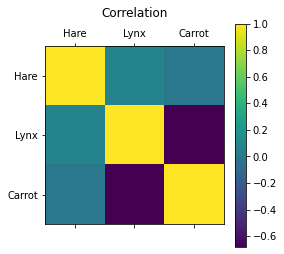

In [14]:
# matshow visualizes a matrix of numbers as colors
plt.matshow(pop_corr)

# We can see which colors correspond to which values with a colorbar
plt.colorbar()

# Sometimes it's useful to have a reference to the current figure object,
# which we can get with "get current figure" or gcf.
fig = plt.gcf()

# And sometimes it's useful to have a reference to the current axis object,
# which we can get with gca.
ax = plt.gca()

# We can control where the axis tick marks are
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])

# ...and what the tick labels are
ax.set_xticklabels(['Hare', 'Lynx', 'Carrot'])
ax.set_yticklabels(['Hare', 'Lynx', 'Carrot'])

# Sometimes your title may overlap your tick labels.
# You can add padding to keep things readable.
plt.title('Correlation', pad=20)
plt.show()

#### Pandas sorting is straightforward. 
Note that the underlying dataframe is not changed; the method just returns a sorted dataframe.

In [15]:
pop_df.sort_values(by=['hare'])

year   hare   lynx  carrot
17  1917   7600  15800   41800
16  1916  11200  29700   36700
18  1918  14600   9700   43300
19  1919  16200  10100   41300
6   1906  18100  19000   38600
15  1915  19500  51100   39000
5   1905  20600  41700   39800
7   1907  21400  13000   42300
8   1908  22000   8300   44500
20  1920  24700   8600   47300
9   1909  25400   9100   42100
10  1910  27100   7400   46000
0   1900  30000   4000   48300
4   1904  36300  59400   40600
11  1911  40300   8000   46800
1   1901  47200   6100   48200
14  1914  52300  45700   39400
12  1912  57000  12300   43800
2   1902  70200   9800   41500
13  1913  76600  19500   40900
3   1903  77400  35200   38200

#### More examples of accessing and manipulating data in dataframes:

In [16]:
# finding all instances when the population of hares is above 50k
hare_above_50K = pop_df.hare > 50000
print(hare_above_50K)
print()
print(pop_df[hare_above_50K])
print()
print(pop_df[hare_above_50K]['year'])

0     False
1     False
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13     True
14     True
15    False
16    False
17    False
18    False
19    False
20    False
Name: hare, dtype: bool

    year   hare   lynx  carrot
2   1902  70200   9800   41500
3   1903  77400  35200   38200
12  1912  57000  12300   43800
13  1913  76600  19500   40900
14  1914  52300  45700   39400

2     1902
3     1903
12    1912
13    1913
14    1914
Name: year, dtype: int64


In [17]:
# To combine numpy logical masks, we can use & and |.

# finding all instances when the population of one of the animal species is above 50k
above_50K = (pop_df["hare"]>50000) | (pop_df["lynx"]>50000)
print(pop_df[above_50K])
print()
print(pop_df[hare_above_50K]['year'])

    year   hare   lynx  carrot
2   1902  70200   9800   41500
3   1903  77400  35200   38200
4   1904  36300  59400   40600
12  1912  57000  12300   43800
13  1913  76600  19500   40900
14  1914  52300  45700   39400
15  1915  19500  51100   39000

2     1902
3     1903
12    1912
13    1913
14    1914
Name: year, dtype: int64


In [18]:
# Dropping columns
pop2 = pop_df.drop("year", axis=1)

# We can also drop rows by id
pop2 = pop2.drop(0, axis=0)

# or we can drop rows using a mask
mask = pop2['carrot'] < 40000
pop2 = pop2[mask]

pop2

hare   lynx  carrot
3   77400  35200   38200
5   20600  41700   39800
6   18100  19000   38600
14  52300  45700   39400
15  19500  51100   39000
16  11200  29700   36700

#### When necessary, we can convert a dataframe (or a series) into a Numpy array:

In [19]:
poptable = pop2.values
poptable

array([[77400, 35200, 38200],
       [20600, 41700, 39800],
       [18100, 19000, 38600],
       [52300, 45700, 39400],
       [19500, 51100, 39000],
       [11200, 29700, 36700]])

## Examples of basic visualization using Pandas and with Matplotlib:

In [20]:
import matplotlib.pyplot as plt

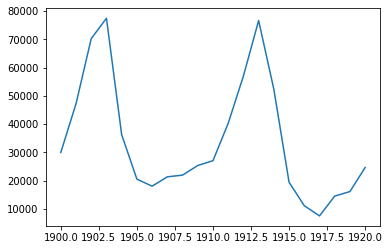

In [21]:
plt.plot(pop_df["year"], pop_df["hare"])
plt.show()

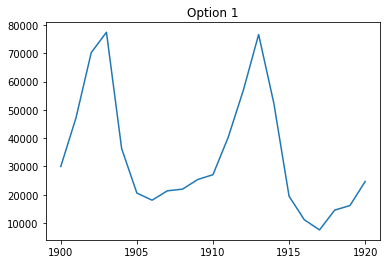

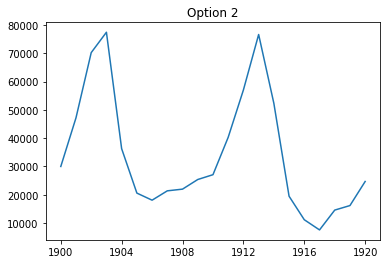

In [22]:
# Note that tick labels are floats by default.
# For nicer looking labels:

# Option 1 - force labels to be integers
plt.plot(pop_df["year"], pop_df["hare"])
ax = plt.gca()
ax.locator_params(integer=True)
plt.title('Option 1')

# Option 2 - cast years to dates and then format as string
years = pd.to_datetime(pop_df["year"].astype(str), format="%Y")
plt.figure()
plt.plot(years, pop_df["hare"])
plt.title('Option 2')

plt.show()

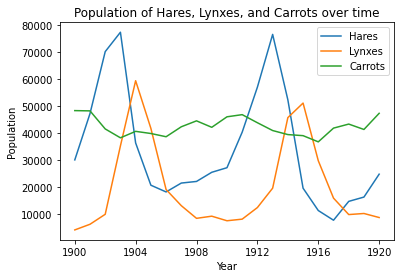

In [23]:
# We can plot multiple series
years = pd.to_datetime(pop_df["year"].astype(str), format="%Y")
plt.plot(years, pop_df["hare"], label='Hares')
plt.plot(years, pop_df["lynx"], label='Lynxes')
plt.plot(years, pop_df["carrot"], label='Carrots')
plt.legend()
plt.ylabel('Population')
plt.xlabel('Year')
plt.title('Population of Hares, Lynxes, and Carrots over time')
plt.show()

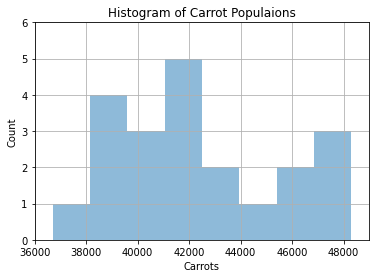

In [24]:
# We can easily plot histograms.
# Pandas dataframes include plotting functions that wrap matplotlib functions.

# plt.hist(pop_df["carrot"], bins=8, alpha=0.5)
pop_df.hist(column=['carrot'], bins=8, alpha=0.5)

plt.xlabel('Carrots')
plt.ylabel('Count')
plt.title('Histogram of Carrot Populaions')

# For ease of viewing, we can set the bounds of the x and y axes
plt.axis([36000, 49000, 0, 6])
plt.grid(True)

#### Pandas has its own versatile "plot" method that can handle most types of charts:

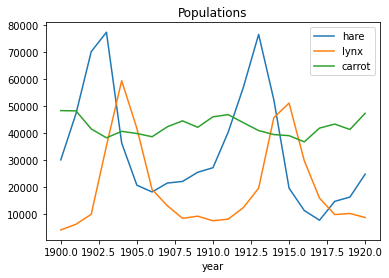

In [25]:
pop_df.plot(x="year", title="Populations")
plt.show()

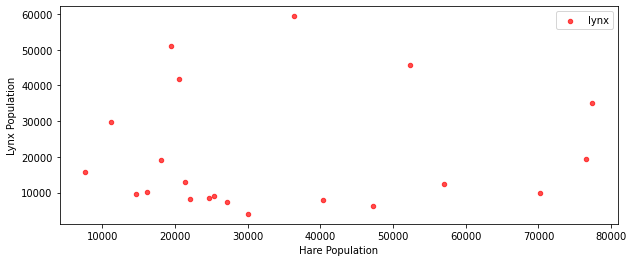

In [26]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
pop_df.plot(x="hare", y="lynx", kind="scatter", c='r', alpha=0.7, label='lynx', ax=ax)
plt.ylabel('Lynx Population')
plt.xlabel('Hare Population')
plt.legend()
plt.show()

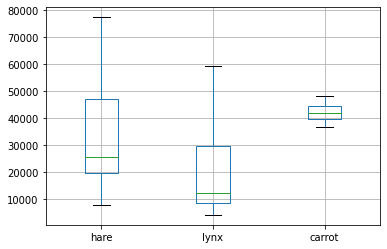

In [27]:
pop_df.boxplot(column=["hare","lynx","carrot"])
plt.show()

## We can add new columns to a dataframe

In [28]:
num_rows = pop_df.shape[0]
fox_col = np.random.randint(low=5000, high=20000, size=num_rows)
fox_col

array([ 7523, 12754,  6211, 15879, 19384, 17613, 13656,  7447, 13028,
        5064, 18851, 15906, 13163, 12652, 13799, 15874, 10897,  8705,
       17308, 19406,  9264])

In [29]:
pop_df["fox"] = pd.Series(fox_col)
pop_df

year   hare   lynx  carrot    fox
0   1900  30000   4000   48300   7523
1   1901  47200   6100   48200  12754
2   1902  70200   9800   41500   6211
3   1903  77400  35200   38200  15879
4   1904  36300  59400   40600  19384
5   1905  20600  41700   39800  17613
6   1906  18100  19000   38600  13656
7   1907  21400  13000   42300   7447
8   1908  22000   8300   44500  13028
9   1909  25400   9100   42100   5064
10  1910  27100   7400   46000  18851
11  1911  40300   8000   46800  15906
12  1912  57000  12300   43800  13163
13  1913  76600  19500   40900  12652
14  1914  52300  45700   39400  13799
15  1915  19500  51100   39000  15874
16  1916  11200  29700   36700  10897
17  1917   7600  15800   41800   8705
18  1918  14600   9700   43300  17308
19  1919  16200  10100   41300  19406
20  1920  24700   8600   47300   9264

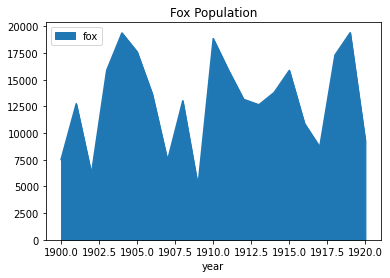

In [30]:
pop_df.plot(x="year", y="fox", kind="area", title="Fox Population")
plt.show()

# Note that pandas includes a legend here by default.
# We never want to include a legend with just one series.
# Keep it from appearing by including legend=False
# Or remove it after using matplotlib:
# plt.gca().get_legend().remove()

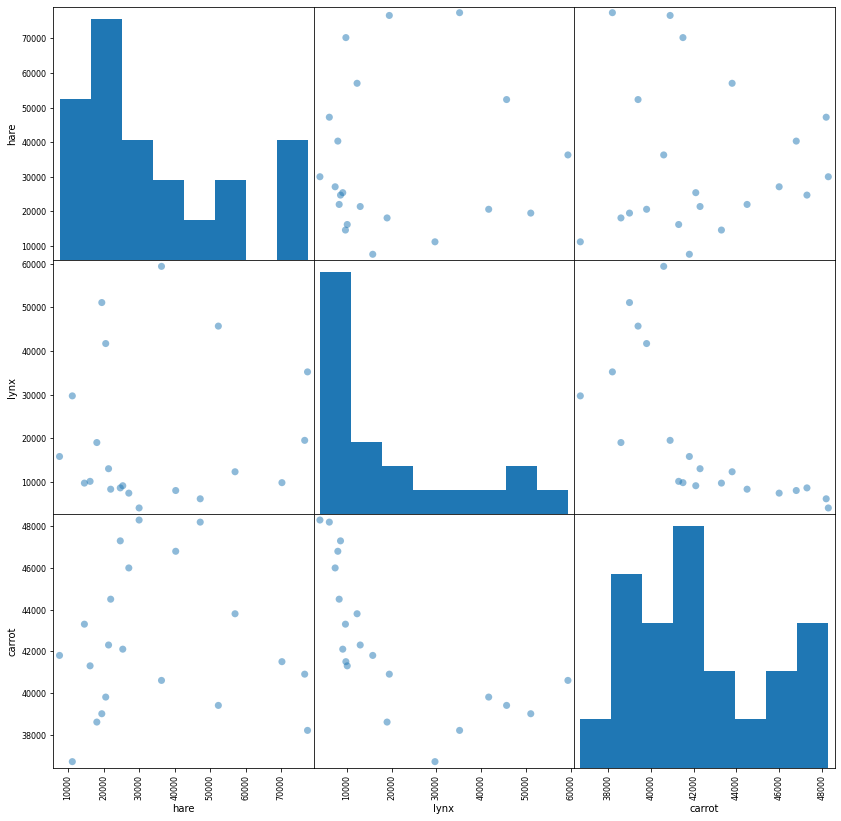

In [31]:
pd.plotting.scatter_matrix(pop_df[["hare","lynx","carrot"]],
                           figsize=(14,14), 
                           hist_kwds={'bins':8}, 
                           alpha=.5, 
                           marker='o', 
                           s=50)
plt.show()